In [1]:
import pandas as pd 
import numpy as np 

In [ ]:
coffee_data = pd.read_csv('/Users/mac/Desktop/Coffee Project/Coffe_sales.csv')
coffee_data.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [3]:
#checking for any missing values
miising_values = coffee_data.isnull().sum()
miising_values

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

No Missing values. Expected, given the usability score of 10.0 on Kaggle

#### Scaling the prices and moving them to a separate column

In [4]:
from mlxtend.preprocessing import minmax_scaling

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
money = coffee_data['money'].to_numpy()

In [7]:
scaled_data = minmax_scaling(money, columns=[0])

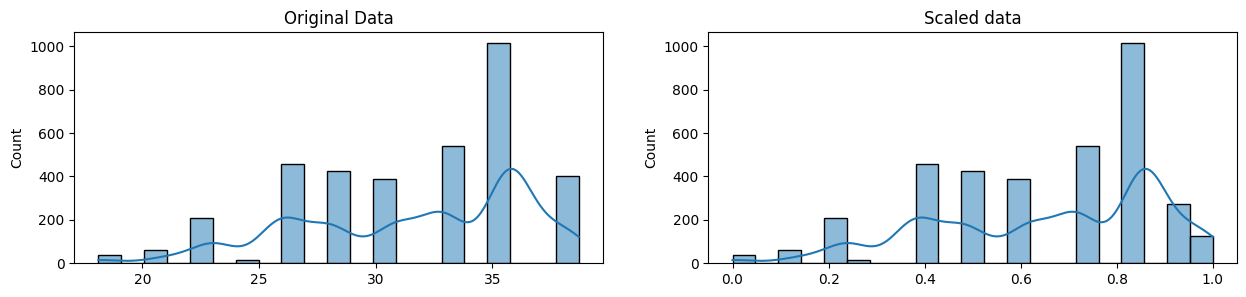

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(money, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

The distribution shape stays the same, but the scale changes to normalized values.

In [9]:
coffee_data['money_scaled'] = scaled_data
coffee_data.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,money_scaled
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,1.00000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,1.00000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,1.00000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,0.52381
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,1.00000


#### Normalizing the prices and moving them to a separate column

In [10]:
from scipy import stats

In [11]:
normalized_data = stats.boxcox(money) #using same money array as above

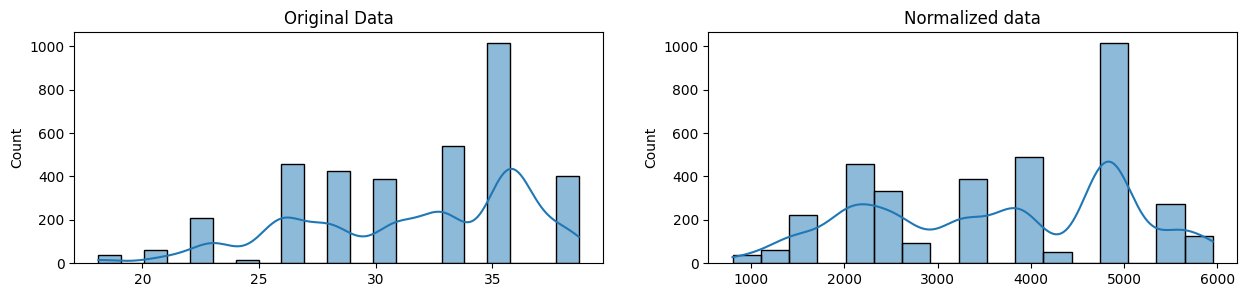

In [12]:
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(money, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

Box-Cox successfully transformed money data from a skewed distribution to a more normal one, which is also why the values changed so much! The results itself might be connected with various factors. It is not very clear, why at 35 there is such an outlier

#### Analyzing the most popular amount of money spent

In [13]:
unique_tr = coffee_data['money'].unique()
unique_tr

array([38.7 , 28.9 , 33.8 , 24.  , 32.82, 37.72, 27.92, 23.02, 18.12,
       35.76, 30.86, 25.96, 21.06])

not too many different values

In [14]:
value_counts = coffee_data['money'].value_counts()
print(value_counts)

money
35.76    1014
32.82     490
25.96     459
30.86     389
27.92     334
37.72     273
23.02     208
38.70     128
28.90      93
21.06      59
33.80      51
18.12      36
24.00      13
Name: count, dtype: int64


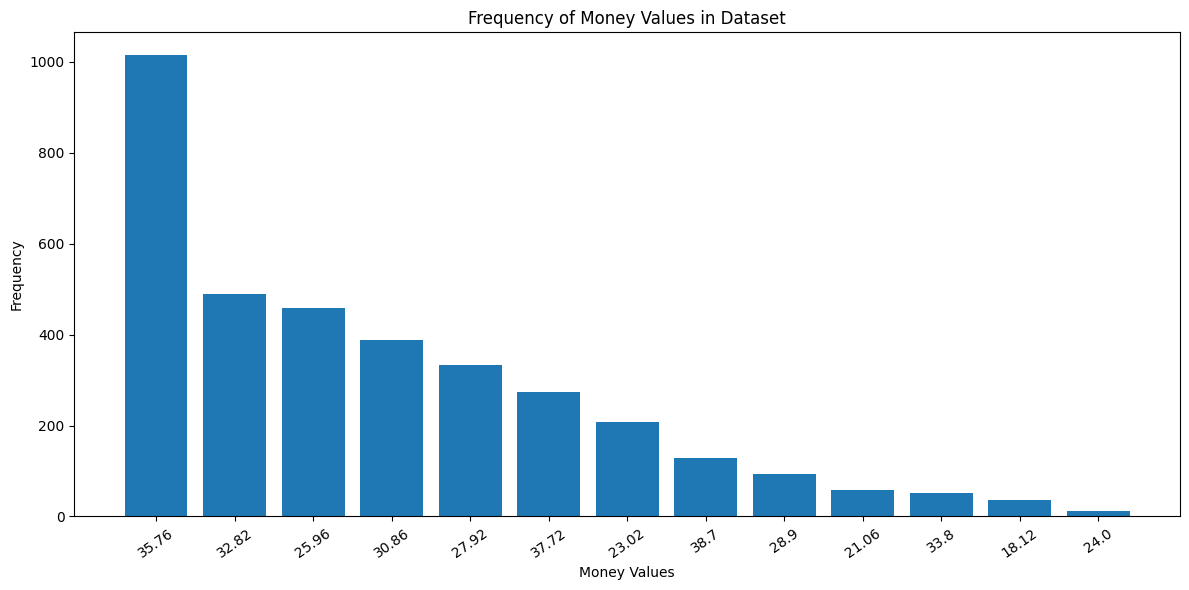

In [15]:
plt.figure(figsize=(12, 6))
bars = plt.bar(value_counts.index.astype(str), value_counts.values) 

plt.xlabel('Money Values')
plt.ylabel('Frequency')
plt.title('Frequency of Money Values in Dataset')
plt.xticks(rotation=35, ha='center')
plt.tight_layout()
plt.show()

##### This shows, that there might be some kind of an extremely popular type of order, valued at 35,76

In [16]:
hit = coffee_data[coffee_data['money'] == 35.76]
coffee_counts = hit['coffee_name'].value_counts()
coffee_counts

coffee_name
Latte            397
Cappuccino       235
Hot Chocolate    193
Cocoa            189
Name: count, dtype: int64

In [17]:
hit_2 = coffee_data[coffee_data['money'] == 32.82]
coffee_counts_2 = hit_2['coffee_name'].value_counts()
coffee_counts_2

coffee_name
Latte                  194
Americano with Milk    147
Cappuccino              96
Cocoa                   27
Hot Chocolate           26
Name: count, dtype: int64

In [18]:
hit_3 = coffee_data[coffee_data['money'] == 25.96]
coffee_counts_3 = hit_3['coffee_name'].value_counts()
coffee_counts_3

coffee_name
Americano    341
Cortado      118
Name: count, dtype: int64

Different drinks priced differently, but no singular outliers. However, we can see that Latte, Hot Chocolate, Cappucino appear both in 35.76 dataset and 32,82 dataset. *Either the price changed, or there are some other order details, which are not included in the dataset.*

To check that, it might be helpful to look at the dates in the datasets

In [19]:
coffee_dates = hit['Date'].value_counts()
coffee_dates

Date
2024-10-17    17
2025-03-03    16
2024-10-11    14
2024-11-05    13
2024-10-20    13
              ..
2025-01-12     1
2025-01-05     1
2024-12-10     1
2024-11-24     1
2024-12-26     1
Name: count, Length: 169, dtype: int64

In [20]:
coffee_dates_2 = hit_2['Date'].value_counts()
coffee_dates_2

Date
2024-09-09    12
2024-07-31    10
2024-09-27     9
2024-08-11     9
2024-09-03     9
              ..
2024-08-28     1
2024-08-30     1
2024-07-28     1
2024-06-14     1
2024-07-15     1
Name: count, Length: 140, dtype: int64

Dates cross, so the things left to check are time of the day, and the day of the week

In [21]:
coffee_day = hit['Weekday'].value_counts()
coffee_day

Weekday
Mon    172
Fri    164
Tue    160
Thu    149
Wed    145
Sat    112
Sun    112
Name: count, dtype: int64

In [22]:
coffee_day = hit['Time_of_Day'].value_counts()
coffee_day

Time_of_Day
Night        387
Afternoon    384
Morning      243
Name: count, dtype: int64

##### No clear pattern. Unfortunately, that indicates missing entries. Most likely, about a side to the coffee.